In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MBB.csv')
df = df.dropna()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,6/1/2018,11783.9,11642.9,11965.2,11562.3,15.87M,0.52%
1,6/4/2018,12267.4,11723.5,12267.4,11683.2,16.32M,4.10%
2,6/5/2018,12267.4,12247.2,12408.4,12005.5,13.13M,0.00%
3,6/6/2018,12307.6,12126.4,12388.2,12045.8,17.76M,0.33%
4,6/7/2018,12448.7,12408.4,12650.1,12327.8,22.65M,1.15%
...,...,...,...,...,...,...,...
1237,5/15/2023,18850.0,18750.0,19100.0,18700.0,17.77M,1.07%
1238,5/16/2023,18800.0,18850.0,18950.0,18700.0,6.75M,-0.27%
1239,5/17/2023,18450.0,18750.0,18800.0,18450.0,9.09M,-1.86%
1240,5/18/2023,18600.0,18550.0,18650.0,18450.0,6.66M,0.81%


In [3]:
#Kiểm tra độ tương quan giữa các cột và lấy cột có tương quan cao nhất để dự đoán 'Price'
features = ['Open', 'High', 'Low']
for i in features:
    correlation = df['Price'].corr(df[i])
    print(i + ": " + str(correlation))


Open: 0.998431195836469
High: 0.9992893243608242
Low: 0.9991983083005012


In [4]:
#Đọc file dữ liệu chứng khoán và chia train test validate theo tỉ lệ 7:1:2
from sklearn.model_selection import train_test_split
df = pd.read_csv('MBB.csv')
df = df[['Price','Open','High','Low']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Chọn các đặc trưng quan sát

train = df['High']
target = df['Price']

train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size


train_data = train[:train_size]
train_target = target[:train_size]
test_data = train[train_size:train_size+test_size]
test_target = target[train_size:train_size+test_size]
val_data = train[train_size+test_size:]
print(val_data)
train_data

1117    15200.0
1118    15100.0
1119    15900.0
1120    16200.0
1121    16100.0
         ...   
1237    19100.0
1238    18950.0
1239    18800.0
1240    18650.0
1241    18700.0
Name: High, Length: 125, dtype: float64


0      11965.2
1      12267.4
2      12408.4
3      12388.2
4      12650.1
        ...   
864    24000.0
865    23833.3
866    23791.7
867    24166.7
868    24125.0
Name: High, Length: 869, dtype: float64

In [5]:
x_train= np.array(train_data).reshape(-1,1)
x_test = np.array(test_data).reshape(-1,1)


rf_model = RandomForestRegressor(n_estimators=600,max_depth = 8, random_state=100)
rf_model.fit(x_train, train_target)

y = test_data
predictions = rf_model.predict(x_test)
print(predictions)
# thres = np.unique([j for i in rf_model.estimators_ for j in i.tree_.threshold])
# np.sort(thres)[-10:]
# print(thres)

# 5. Quá trình Validate
x_val= np.array(val_data).reshape(-1,1)
y_val = np.array(val_data)
y_pred_val =  rf_model.predict(x_val)
print(y_pred_val)

[23249.38770168 23249.38770168 23789.84694068 24254.19415596
 24243.75252209 24921.2689275  25890.6016733  25915.78146572
 24854.14234286 24750.87408095 24254.19415596 24426.50638543
 24243.75252209 23604.9667331  23245.66247182 23249.38770168
 23590.76767247 23249.38770168 23547.1713452  23590.76767247
 23604.72154294 23764.27395952 23504.32293049 23249.07191825
 23245.66247182 23214.32901573 23119.60297909 23270.16654048
 23504.32293049 23504.32293049 23770.40166821 23713.37872334
 24135.02455998 24243.75252209 23983.52470527 23590.76767247
 23770.40166821 23713.37872334 23547.1713452  24004.0427715
 24719.52832571 24727.28305714 24693.21180528 25078.23263902
 24718.66920905 25202.67154802 26504.65916667 26774.87566667
 26774.87566667 26774.87566667 26774.87566667 26774.87566667
 26774.87566667 26774.87566667 26774.87566667 26774.87566667
 26774.87566667 26774.87566667 26774.87566667 26774.87566667
 26774.87566667 26774.87566667 26774.87566667 26774.87566667
 26774.87566667 26774.875

In [6]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(np.mean((test_target - predictions)**2))
print(rmse)

536.4731928893145


In [7]:
# Dự đoán 30 ngày tiếp theo của feature 'High' dựa trên Linear Regression
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()

ln_model.fit(np.array(train_data.index).reshape(-1,1), train_data)


#test
x_test_ln = np.array(test_data.index).reshape(-1, 1)
y_test_ln = np.array(test_data)
y_pred_ln = ln_model.predict(x_test_ln)

# Quá trình Validate
x_val_ln= np.array(val_data.index).reshape(-1, 1)
y_val_ln = np.array(val_data)
y_pred_val_ln =  ln_model.predict(x_val_ln)

# Predict the closing prices for the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

feature_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
feature_next_30_days = ln_model.predict(feature_next_30_days)





In [8]:
#Dự đoán 30 ngày tiếp theo
y_next_30_days = rf_model.predict(np.array(feature_next_30_days).reshape(-1,1))
print(y_next_30_days)

[24782.95928929 24782.95928929 24974.22048241 25029.07437791
 25029.07437791 25029.07437791 25060.44247235 25060.44247235
 25060.44247235 25063.01268624 25111.35193862 25244.74451468
 25244.74451468 25232.60037579 25202.67154802 25202.67154802
 25202.67154802 24961.12789921 24938.36309365 24938.36309365
 24938.36309365 24818.2820881  24818.2820881  24820.32952143
 24819.15685476 24707.39329246 24707.39329246 24708.64127964
 24717.43680528 24693.21180528]


Validation RMSE: 6138.089141299562
Testing RMSE: 4374.184660742223
Validation MAPE: 33.6558624979029
Testing MAPE: 15.368828857514567
Validation MAE: 6079.406965965989
Testing MAE: 3621.6835279869974


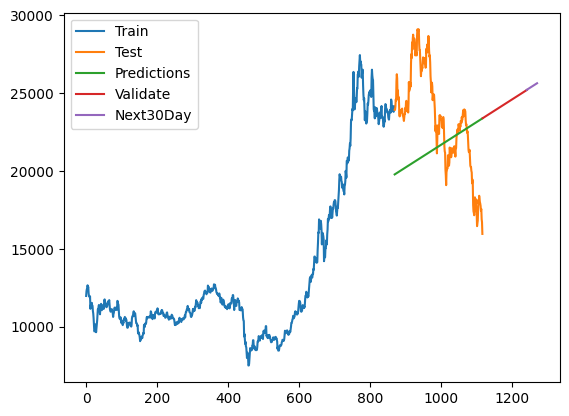

In [9]:
valid_rmse = np.sqrt(np.mean((y_pred_val_ln - y_val_ln)**2))
test_rmse = np.sqrt(np.mean((y_pred_ln - y_test_ln)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

valid_mape = np.mean(np.abs((y_pred_val_ln - y_val_ln) / y_val_ln)) * 100
test_mape = np.mean(np.abs((y_pred_ln - y_test_ln) / y_test_ln)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

valid_mae = np.mean(np.abs(y_pred_val_ln - y_val_ln))
test_mae = np.mean(np.abs(y_pred_ln - y_test_ln))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred_ln)
plt.plot(val_data.index, y_pred_val_ln)
plt.plot(last_data,feature_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [10]:
import matplotlib.pyplot as plt

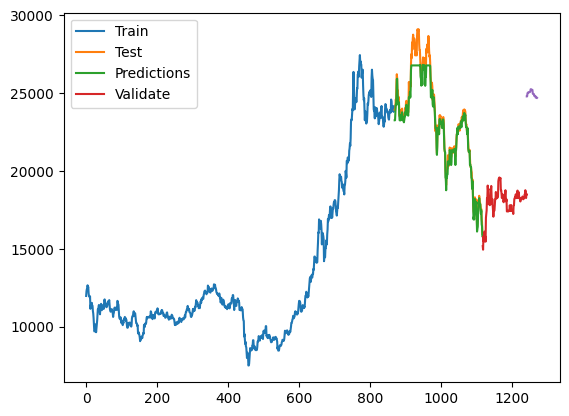

In [11]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, predictions)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate'])
plt.show()